In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0


In [94]:
import timeit
start = timeit.timeit()
#La primera capa Dense tiene 128 nodos (o neuronas)
#capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1.
#la ultima es de pertenencia
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

#Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento
#Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve
#Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entregue los datos de entrenamiento al modelo
#el modelo aprende a asociar imagenes y etiquetas
#Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo
model.fit(train_images, train_labels, epochs=10)

end = timeit.timeit()
print(end - start)

Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.5269 - acc: 0.8149
Epoch 2/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3990 - acc: 0.8572
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3614 - acc: 0.8699
Epoch 4/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3383 - acc: 0.8764
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3238 - acc: 0.8823
Epoch 6/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.3088 - acc: 0.8860
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2988 - acc: 0.8889
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2886 - acc: 0.8933
Epoch 9/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2818 - acc: 0.8958
Epoch 10/10
60000/60000 [==============================] - 14s 227us

10000/10000 - 2s - loss: 0.3431 - acc: 0.8778

Test accuracy: 0.8778


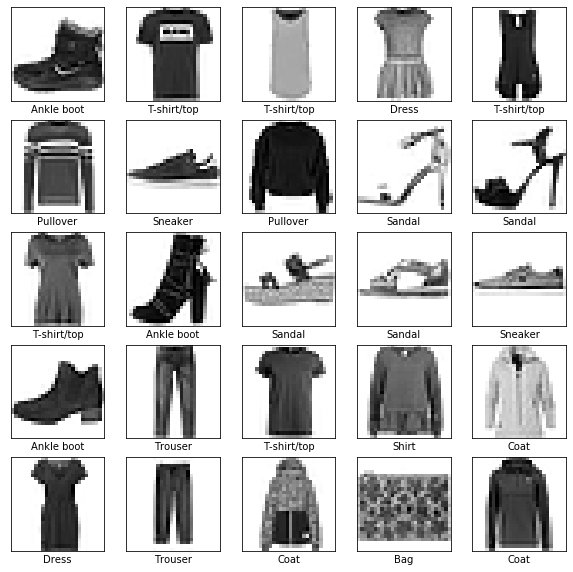

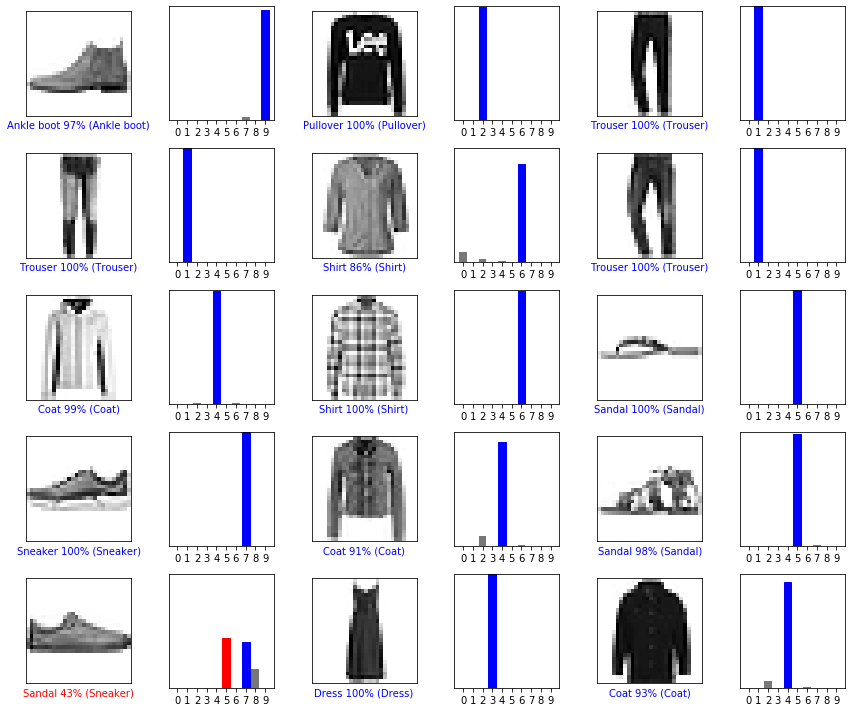

In [95]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
